In [11]:
import os
import json
import pyspark
import matplotlib.pyplot as plt

import pandas as pd

sc = pyspark.SparkContext().getOrCreate()

24/12/01 15:59:19 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [12]:
rdd = sc.textFile('./data/Amazon_Fashion.jsonl')
parsed_rdd = rdd.map(lambda line: json.loads(line.strip()))
augmented_rdd = (
    parsed_rdd
    # .filter(lambda record: len(record["title"]) > 0)
    .map(
        lambda record: (
            record["rating"], 
            len(record["title"])
        )
    )
)

In [3]:
augmented_rdd.take(5)

[(5.0, 13), (5.0, 1), (2.0, 9), (1.0, 15), (5.0, 20)]

In [13]:
grouped_rdd = augmented_rdd.groupByKey()
average_rdd = grouped_rdd.mapValues(lambda lengths: sum(lengths) / len(lengths))
result = average_rdd.collect()
print(result)

[(1.0, 21.557613270448336), (2.0, 22.883628691010134), (3.0, 23.503138863653955), (4.0, 22.348151007444788), (5.0, 18.877107948856736)]


In [5]:
df = pd.DataFrame(result, columns=["rating", "average_title_len"])

In [14]:
x, y = zip(*result)

In [10]:
sc.stop()

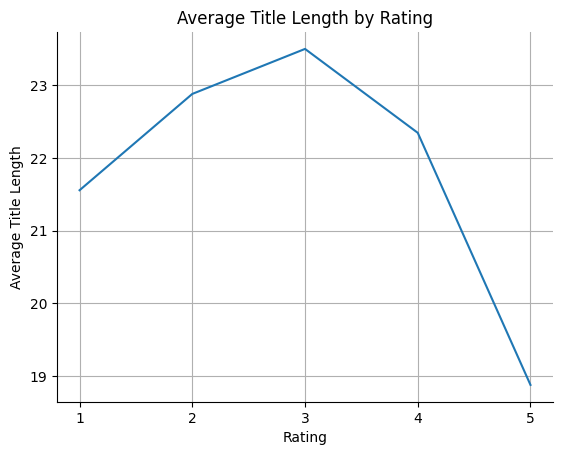

In [7]:
plt.plot(range(1, 6), df["average_title_len"].values)
plt.title("Average Title Length by Rating")
plt.ylabel("Average Title Length")
plt.xlabel("Rating")
plt.xticks(range(1, 6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid()
plt.show()